In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sm
from IPython.display import display as Idisplay, Math as Imath

In [2]:
sm.init_printing()


def display(equations):
    Idisplay(Imath(sm.latex(equations)))

In [3]:
x, t, h, tau, lm, sg = sm.symbols('x t h tau lambda sigma')
u_s = sm.Function('u')(x, t)

a1, a2, a3, a4 = sm.symbols('a_1 a_2 a_3 a_4')

In [4]:
def expansion(f: sm.Function, var: sm.Symbol, delta, n=4) -> sm.Function:
    return sum(delta ** i / sm.factorial(i) * f.diff(var, i) for i in range(n))


def expansion2(f: sm.Function, var1: sm.Symbol, var2: sm.Symbol, delta1, delta2):
    res = expansion(expansion(f, var1, delta1), var2, delta2).expand()
    return (res + sm.O(delta1 ** 4) + sm.O(delta2 ** 4) + sm.O(delta1 ** 2 * delta2 ** 2)
            + sm.O(delta1 * delta2 ** 3) + sm.O(delta1 ** 3 * delta2)).simplify().removeO()


In [5]:
assert expansion2(u_s, x, t, 0, 0) == u_s

![](img.png "Title")

$$
U_m^{n+1}=a_1U_{m-1}^n+a_2U_{m+1}^n+a_3U_m^{n-1}+a_4U_{m-2}^{n-1}
$$

In [6]:
expr = sm.Eq(expansion2(u_s, x, t, 0, tau), a1 * expansion2(u_s, x, t, -h, 0) + a2 * expansion2(u_s, x, t, h, 0) \
             + a3 * expansion2(u_s, x, t, 0, -tau) + a4 * expansion2(u_s, x, t, -2 * h, -tau))
display(expr)

<IPython.core.display.Math object>

$$
U_t=-\lambda U_x
\\
U_{tt}=-\lambda^2 U_{xx}
\\
U_{ttt}=-\lambda^3 U_{xxxx}
\\
U_{xt}=-\lambda U_{xx}
\\
U_{xtt}=\lambda^2 U_{xxx}
\\
U_{xxt}=-\lambda U_{xxx}
$$

In [7]:
expr = expr.subs(u_s.diff(t), -lm * u_s.diff(x)).simplify()
expr = expr.subs(u_s.diff(t, 2), lm ** 2 * u_s.diff(x, 2)).simplify()
expr = expr.subs(u_s.diff(t, 3), -lm ** 3 * u_s.diff(x, 3)).simplify()
expr = expr.subs(u_s.diff(x).diff(t), -lm * u_s.diff(x, 2)).simplify()
expr = expr.subs(u_s.diff(x).diff(t, 2), lm ** 2 * u_s.diff(x, 3)).simplify()
expr = expr.subs(u_s.diff(x, 2).diff(t), -lm * u_s.diff(x, 3)).simplify()
display(expr)

<IPython.core.display.Math object>

In [8]:
expr2 = expr.lhs - expr.rhs
expr2 = sm.factor(expr2).collect(u_s)
display(expr2)

<IPython.core.display.Math object>

In [9]:
system = [
    sm.Eq(expr2.coeff(u_s), 0),
    sm.Eq(expr2.coeff(u_s.diff(x)) / h, 0).expand().subs(lm * tau / h, sg),
    sm.Eq(expr2.coeff(u_s.diff(x, 2)) * 2 / h ** 2, 0).expand().subs(lm * tau / h, sg),
    sm.Eq(expr2.coeff(u_s.diff(x, 3)) * 6 / h ** 3, 0).expand().subs(lm * tau / h, sg)
]

In [10]:
for i in system:
    display(sm.Eq(i.lhs.collect([a1, a2, a3, a4]).simplify(), 0))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# Первый порядок - первые два уравнения

In [11]:
system1 = sm.solve(system[:2], [a1, a2])
display(system1)

<IPython.core.display.Math object>

In [12]:
for i in [*system1.values(), a3, a4]:
    display(i.collect((a3, a4)) >= 0)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# Второй порядок - первые три уравнения

In [13]:
system2 = sm.solve(system[:3], [a1, a2, a3])
for i, j in system2.items():
    display(sm.Eq(i, j).simplify())

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# Третий порядок - все уравнения

In [14]:
system3 = sm.solve(system, [a1, a2, a3, a4])
for i, j in system3.items():
    display(sm.Eq(i, j).simplify())

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [15]:
sigma = 0.25

## Четырёхугольник в координатах x = a_4, y = a_3

In [16]:
display(system1[a1].subs(sg, sigma).nsimplify() >= 0)
display(system1[a2].subs(sg, sigma).nsimplify() >= 0)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [17]:
A = (sm.solve(sm.Eq(system1[a1].subs(a3, 0).subs(sg, sigma), 0), a4)[0].nsimplify(), 0)
B = tuple(i.nsimplify() for i in
          sm.solve([sm.Eq(system1[a1].subs(sg, sigma), 0), sm.Eq(system1[a2].subs(sg, sigma), 0)]).values())[::-1]
C = (0, sm.solve(sm.Eq(system1[a2].subs(a4, 0).subs(sg, sigma), 0), a3)[0].nsimplify())
D = (0, 0)
display(A)
display(B)
display(C)
display(D)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Прямая в координатах x = a_4, y = a_3

In [18]:
line1 = sm.Eq(a3, system2[a3].subs(sg, sigma).nsimplify())
display(line1)

<IPython.core.display.Math object>

### Построим для наглядности

![](graph.png "Graph")

### Найдем точку на прямой, ближайшую к четырехугольнику

In [19]:
line2 = sm.Eq(a3, (-5 / 11 * a4 + 0.6).nsimplify())
display(line2)
M = tuple(sm.solve((line1, line2), [a4, a3]).values())[::-1]
display(M)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Обозначим точки левее и правее найденной

![](graph_2.png "Graph")

In [67]:
M1 = (-0.18, line1.rhs.subs(a4, -0.18))
display(M1)
M2 = (-0.1, line1.rhs.subs(a4, -0.1))
display(M2)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Подготовка к практике

In [20]:
def get_a1_1(a_3, a_4):
    return system1[a1].subs(sg, sigma).subs(a3, a_3).subs(a4, a_4)


def get_a2_1(a_3, a_4):
    return system1[a2].subs(sg, sigma).subs(a3, a_3).subs(a4, a_4)


def get_a1_2(a_4):
    return system2[a1].subs(sg, sigma).subs(a4, a_4)


def get_a2_2(a_4):
    return system2[a2].subs(sg, sigma).subs(a4, a_4)


def get_a3_2(a_4):
    return system3[a3].subs(sg, sigma).subs(a4, a_4)


def get_a1_3():
    return system3[a1].subs(sg, sigma)


def get_a2_3():
    return system3[a2].subs(sg, sigma)


def get_a3_3():
    return system3[a3].subs(sg, sigma)


def get_a4_3():
    return system3[a4].subs(sg, sigma)

In [21]:
def f(_x: np.ndarray):
    return ((_x <= 0.6) & (0.4 <= _x)).astype(int)


def u_an(_x: np.ndarray, _t: float):
    return np.where(_x - _t >= 0, f(_x - _t), 0)

In [49]:
X = 201
xx = np.linspace(0, 2, X)
h_x = np.diff(xx)[0]

N = 101
tau_t = sigma * h_x
tt = np.linspace(0, 100 * tau_t, N)

In [50]:
u_analytic = np.array([u_an(xx, _t) for _t in tt])

In [61]:
def solve(a_1, a_2, a_3, a_4, _t=100):
    u = np.zeros((N, X))
    u[0] = f(xx)
    u[1] = u_an(xx, tt[1])
    for n in range(1, N - 1):
        u[n + 1, 2:-1] = a_1 * u[n, 1:-2] + a_2 * u[n, 3:] + a_3 * u[n - 1, 2:-1] + a_4 * u[n - 1, 0:-3]

    plt.plot(xx, u[_t])
    plt.plot(xx, u_analytic[_t])
    plt.grid()
    plt.show()


# Схемы первого порядка в вершинах четырехугольника

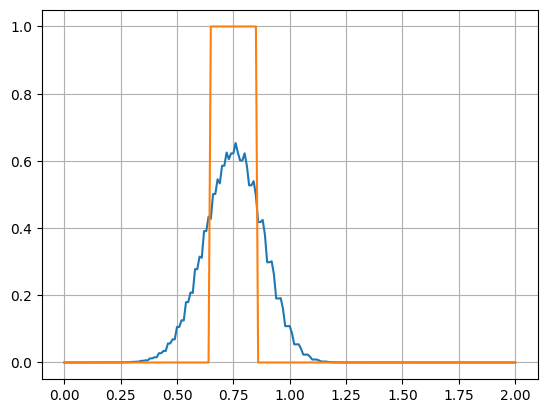

In [62]:
A_p = (get_a1_1(A[1], A[0]), get_a2_1(A[1], A[0]), A[1], A[0])
solve(*A_p)

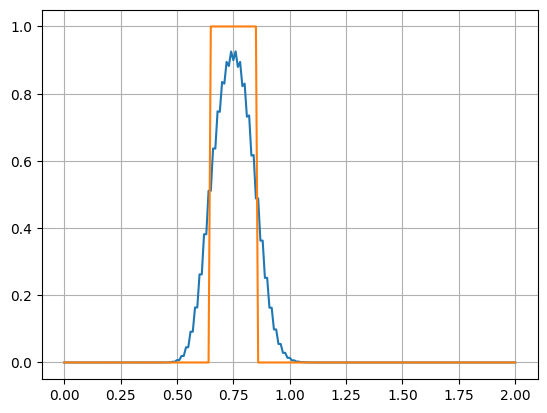

In [53]:
B_p = (get_a1_1(B[1], B[0]), get_a2_1(B[1], B[0]), B[1], B[0])
solve(*B_p)

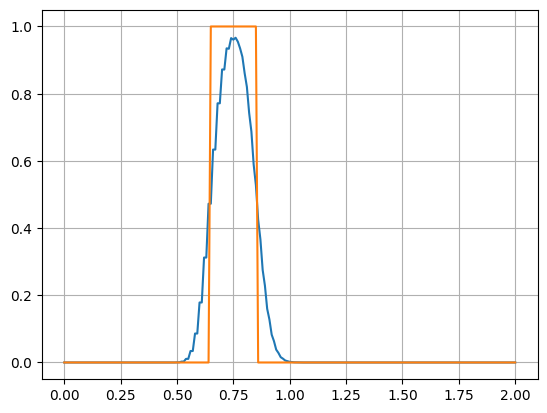

In [54]:
C_p = (get_a1_1(C[1], C[0]), get_a2_1(C[1], C[0]), C[1], C[0])
solve(*C_p)

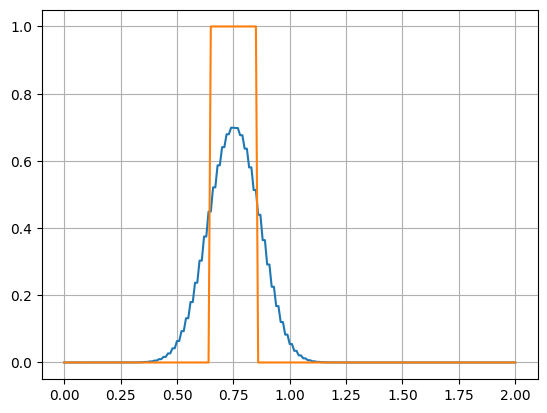

In [55]:
D_p = (get_a1_1(D[1], D[0]), get_a2_1(D[1], D[0]), D[1], D[0])
solve(*D_p)

# Схемы второго порядка - наиболее близкая к четырехугольнику и по разные стороны

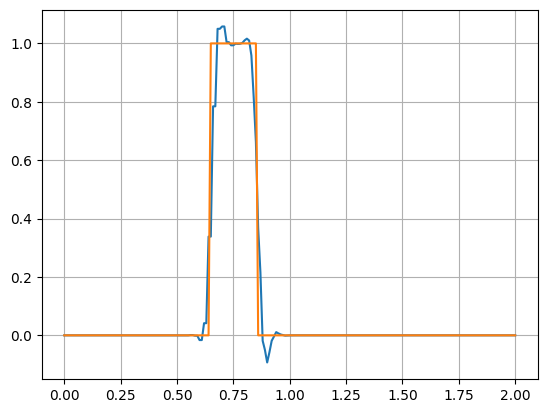

In [72]:
M_p = (get_a1_2(M[0]), get_a2_2(M[0]), M[1], M[0])
solve(*M_p)

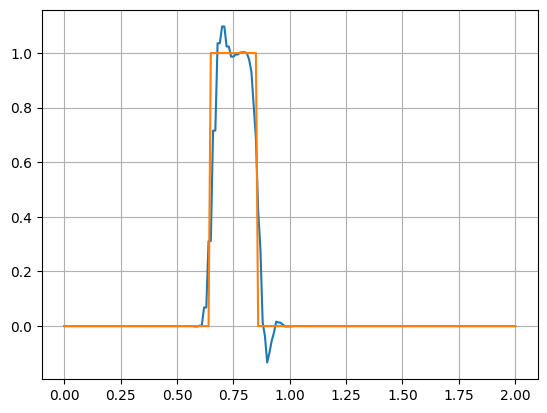

In [97]:
M1_p = (get_a1_2(M1[0]), get_a2_2(M1[0]), M1[1], M1[0])
solve(*M1_p)

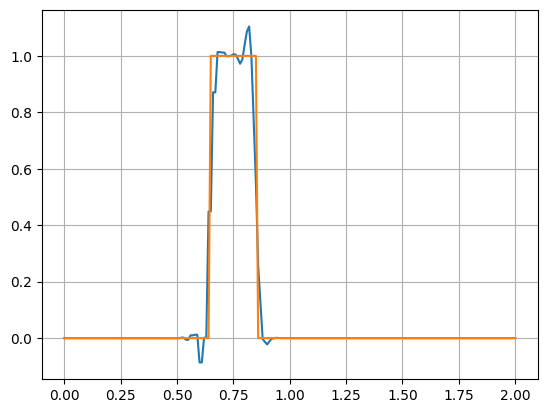

In [74]:
M2_p = (get_a1_2(M2[0]), get_a2_2(M2[0]), M2[1], M2[0])
solve(*M2_p)

# Схема третьего порядка

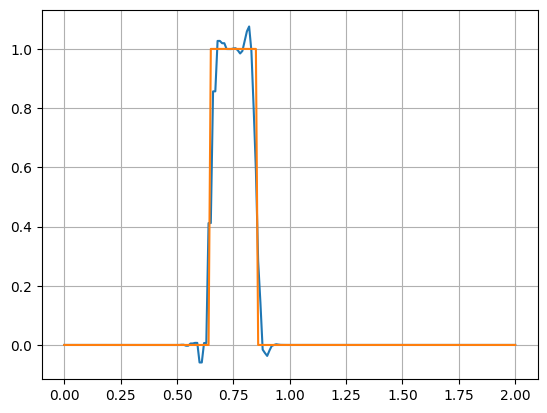

In [102]:
M3_p = (get_a1_3(), get_a2_3(), get_a3_3(), get_a4_3())
solve(*M3_p)

# Гибридные схемы

In [111]:
def step(aa, u, n, j):
    return aa[0] * u[n][j - 1] + aa[1] * u[n][j + 1] + aa[2] * u[n - 1][j] + aa[3] * u[n - 1][j - 2]


def hybrid_solve(coef, _t=100):
    u = np.zeros((N, X))
    u[0] = f(xx)
    u[1] = u_an(xx, tt[1])
    u = u.tolist()
    for n in range(1, N - 1):
        for j in range(2, X - 1):
            for c in coef:
                u[n + 1][j] = step(c, u, n, j)
                u_min = min(u[n][j - 1], u[n][j])
                u_max = max(u[n][j - 1], u[n][j])
                if u_min <= u[n + 1][j] <= u_max:
                    break

    plt.plot(xx, u[_t])
    plt.plot(xx, u_analytic[_t])
    plt.grid()
    plt.show()

### По точкам M1 и M2

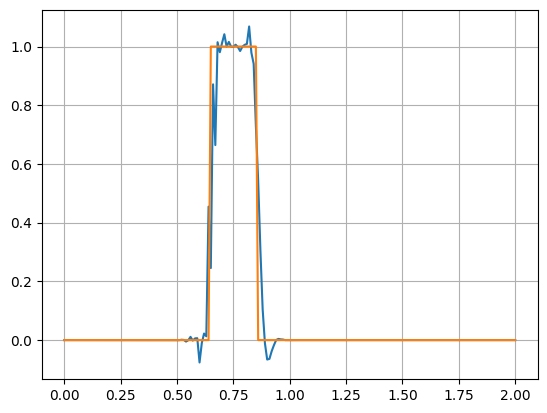

In [112]:
hybrid_solve([M1_p, M2_p])

### По точкам M3 и M1

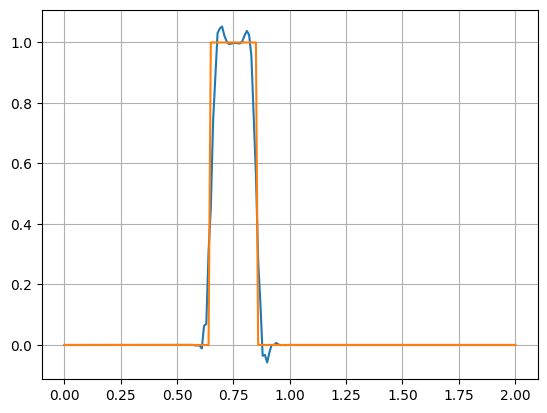

In [114]:
hybrid_solve([M3_p, M1_p])

### По точкам M3, M2 и M1

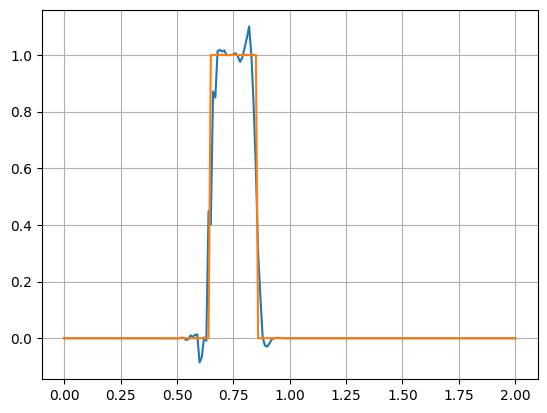

In [115]:
hybrid_solve([M3_p, M2_p, M2_p])